In [26]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [66]:
lam_obs = np.arange(3000,9000,0.1)

In [10]:
linevals = np.genfromtxt('lines_inoue_2014_1.txt',dtype='float',comments='#',delimiter=' ')
print(linevals.shape)

j_index = linevals[0:,0]
lam_j = linevals[0:,1]
A_LAF_j1 = linevals[0:,2]
A_LAF_j2 = linevals[0:,3]
A_LAF_j3 = linevals[0:,4]
A_DLA_j1 = linevals[0:,5]
A_DLA_j2 = linevals[0:,6]


(39, 7)


In [76]:
# lyman alpha forest
opt_depth_LAF = np.zeros((len(lam_obs),))
# damped lyman absorber
opt_depth_DLA = np.zeros((len(lam_obs),))
# lyman continuum
opt_depth_LC_LAF = np.zeros((len(lam_obs),))
opt_depth_LC_DLA = np.zeros((len(lam_obs),))

z_source = 4

for j in tqdm(range(len(lam_j))):
    for i in range(len(lam_obs)):
        if (lam_obs[i] < 2.2*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
            opt_depth_LAF[i] = opt_depth_LAF[i] + A_LAF_j1[j]*np.power(lam_obs[i]/lam_j[j],1.2)
        elif (lam_obs[i] > 2.2*lam_j[j]) & (lam_obs[i] < 5.7*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
            opt_depth_LAF[i] = opt_depth_LAF[i] + A_LAF_j2[j]*np.power(lam_obs[i]/lam_j[j],3.7)
        elif (lam_obs[i] > 5.7*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
            opt_depth_LAF[i] = opt_depth_LAF[i] + A_LAF_j3[j]*np.power(lam_obs[i]/lam_j[j],5.5)
        
        if (lam_obs[i] < 3.0*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
            opt_depth_DLA[i] = opt_depth_DLA[i] + A_DLA_j1[j]*np.power(lam_obs[i]/lam_j[j],2.0)
        elif (lam_obs[i] > 3.0*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
            opt_depth_DLA[i] = opt_depth_DLA[i] + A_DLA_j2[j]*np.power(lam_obs[i]/lam_j[j],3.0)
        
# lyman limit wavelength (Cox 2000)
lam_L = 911.8
for j in tqdm(range(len(lam_j))):
        for i in range(len(lam_obs)):         
            if (z_source < 1.2):
                if (lam_obs[i] > lam_L) & (lam_obs[i] < lam_L*(1+z_source)):
                    opt_depth_LC_LAF[i] = 0.325*(np.power((lam_obs[i]/lam_L),1.2) - np.power(1+z_source,-0.9)*np.power(lam_obs[i]/lam_L,2.1))
                elif (lam_obs[i] > lam_L) & (lam_obs[i] > lam_L*(1+z_source)):
                    opt_depth_LC_LAF[i] = 0
            elif (z_source > 1.2) & (z_source) < 4.7:
                if (lam_obs[i] > lam_L) & (lam_obs[i] < 2.2*lam_L):
                    opt_depth_LC_LAF[i] = 2.55e-2*np.power(1+z_source,1.6)*np.power(lam_obs[i]/lam_L,2.1) + 0.325*np.power(lam_obs[i]/lam_L,1.2) - 0.250*np.power(lam_obs[i]/lam_L,2.1)
                elif (lam_obs[i] > lam_L) & (lam_obs[i] > 2.2*lam_L) & (lam_obs[i] < lam_L*(1+z_source)):
                    opt_depth_LC_LAF[i] = 2.55e-2*(np.power(1+z_source,1.6)*np.power(lam_obs[i]/lam_L,2.1) - np.power(lam_obs[i]/lam_L,3.7) )
                elif (lam_obs[i] > lam_L) & (lam_obs[i] > (1+z_source)*lam_L):
                    opt_depth_LC_LAF[i] = 0
            elif (z_source > 4.7):
                if (lam_obs[i] > lam_L) & (lam_obs[i] < 2.2*lam_L):
                    opt_depth_LC_LAF[i] = 5.22e-4*np.power(1+z_source,3.4)*np.power(lam_obs[i]/lam_L,2.1) + 0.325*np.power(lam_obs[i]/lam_L,1.2) -3.14e-2*np.power(lam_obs[i]/lam_L,2.1)
                elif (lam_obs[i] > lam_L) & (lam_obs[i] > 2.2*lam_L) & (lam_obs[i] < 5.7*lam_L):
                    opt_depth_LC_LAF[i] = 5.22e-4*np.power(1+z_source,3.4)*np.power(lam_obs[i]/lam_L,2.1) + 0.218*np.power(lam_obs[i]/lam_L,2.1) -2.55e-2*np.power(lam_obs[i]/lam_L,3.7)
                elif (lam_obs[i] > lam_L) & (lam_obs[i] > 5.7*lam_L) & (lam_obs[i] < lam_L*(1+z_source)):
                    opt_depth_LC_LAF[i] = 5.22e-4*(np.power(1+z_source,3.4)*np.power(lam_obs[i]/lam_L,2.1) - np.power(lam_obs[i]/lam_L,5.5) )
                elif (lam_obs[i] > lam_L) & (lam_obs[i] > (1+z_source)*lam_L):
                    opt_depth_LC_LAF[i] = 0
                    
            if (z_source < 2.0):
                if (lam_obs[i] > lam_L) & (lam_obs[i] < lam_L*(1+z_source)):
                    opt_depth_LC_DLA[i] = 0.211*np.power(1+z_source,2.0) - 7.66e-2*np.power(1+z_source,2.3)*np.power(lam_obs[i]/lam_L,-0.3) - 0.135*np.power(lam_obs[i]/lam_L,2.0)
                elif (lam_obs[i] > lam_L) & (lam_obs[i] > lam_L*(1+z_source)):
                    opt_depth_LC_DLA[i] = 0
            elif (z_source > 2.0):
                if (lam_obs[i] > lam_L) & (lam_obs[i] < 3.0*lam_L):
                    opt_depth_LC_DLA[i] = 0.634 + 4.70e-2*np.power(1+z_source,3.0) - 1.78e-2*np.power(1+z_source,3.3)*np.power(lam_obs[i]/lam_L,-0.3) - 0.135*np.power(lam_obs[i]/lam_L,2.0) - 0.291*np.power(lam_obs[i]/lam_L,-0.3)       
                elif (lam_obs[i] > lam_L) & (lam_obs[i] > 3.0*lam_L) & (lam_obs[i] < lam_L*(1+z_source)):
                    opt_depth_LC_DLA[i] = 4.70e-2*np.power(1+z_source,3.0) - 1.78e-2*np.power(1+z_source,3.3)*np.power(lam_obs[i]/lam_L,-0.3) - 2.92e-2*np.power(lam_obs[i]/lam_L,3.0)
                elif (lam_obs[i] > lam_L) & (lam_obs[i] > (1+z_source)*lam_L):
                    opt_depth_LC_DLA[i] = 0
                
        


100%|██████████| 39/39 [00:14<00:00,  2.35it/s]


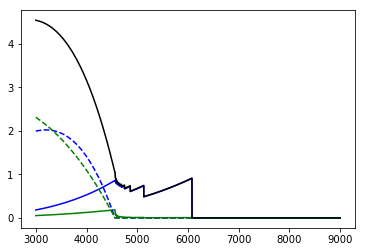

In [77]:
plt.plot(lam_obs,opt_depth_LAF,'b')
plt.plot(lam_obs,opt_depth_DLA,'g')
plt.plot(lam_obs,opt_depth_LC_LAF,'b--')
plt.plot(lam_obs,opt_depth_LC_DLA,'g--')
plt.plot(lam_obs,opt_depth_LAF + opt_depth_DLA + opt_depth_LC_LAF + opt_depth_LC_DLA,'k')
plt.show()

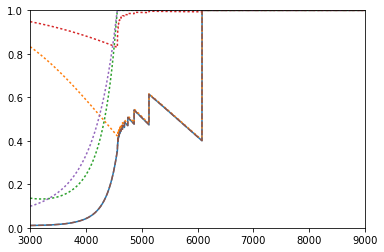

In [92]:
opt_depth = opt_depth_LAF + opt_depth_DLA + opt_depth_LC_LAF + opt_depth_LC_DLA
transmission = np.exp(-(opt_depth_LAF + opt_depth_DLA + opt_depth_LC_LAF + opt_depth_LC_DLA))

plt.plot(lam_obs,transmission)
plt.plot(lam_obs,np.exp(-opt_depth_LAF),':')
plt.plot(lam_obs,np.exp(-opt_depth_LC_LAF),':')
plt.plot(lam_obs,np.exp(-opt_depth_DLA),':')
plt.plot(lam_obs,np.exp(-opt_depth_LC_DLA),':')
plt.plot(lam_obs,np.exp(-(opt_depth_LC_DLA + opt_depth_DLA +opt_depth_LAF + opt_depth_LC_LAF)),'--')
plt.axis([3000,9000,0,1])
plt.show()

100%|██████████| 39/39 [00:10<00:00,  3.65it/s]


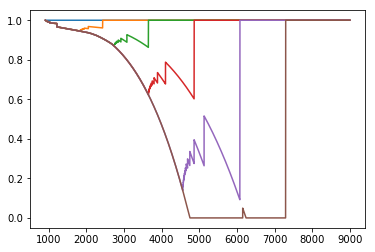

In [50]:
for z_source in range(6):
    

    opt_depth_LAF = np.zeros((len(lam_obs),))
    for j in tqdm(range(len(lam_j))):
        for i in range(len(lam_obs)):
            if (lam_obs[i] < 2.2*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
                opt_depth_LAF[i] = opt_depth_LAF[i] + A_LAF_j1[j]*np.power(lam_obs[i]/lam_j[j],1.2)
            elif (lam_obs[i] > 2.2*lam_j[j]) & (lam_obs[i] < 5.7*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
                opt_depth_LAF[i] = opt_depth_LAF[i] + A_LAF_j2[j]*np.power(lam_obs[i]/lam_j[j],3.7)
            elif (lam_obs[i] > 5.7*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
                opt_depth_LAF[i] = opt_depth_LAF[i] + A_LAF_j3[j]*np.power(lam_obs[i]/lam_j[j],5.5)
    mask1 = opt_depth_LAF > 1
    temp = opt_depth_LAF
    temp[mask1] = 1
    transmission = 1 - temp
    plt.plot(lam_obs,transmission)
plt.show()
            

100%|██████████| 39/39 [00:20<00:00,  1.78it/s]


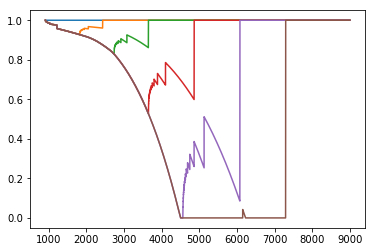

In [57]:
for z_source in range(6):
    

    opt_depth_LAF = np.zeros((len(lam_obs),))
    opt_depth_DLA = np.zeros((len(lam_obs),))

    for j in tqdm(range(len(lam_j))):
        for i in range(len(lam_obs)):
            if (lam_obs[i] < 2.2*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
                opt_depth_LAF[i] = opt_depth_LAF[i] + A_LAF_j1[j]*np.power(lam_obs[i]/lam_j[j],1.2)
            elif (lam_obs[i] > 2.2*lam_j[j]) & (lam_obs[i] < 5.7*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
                opt_depth_LAF[i] = opt_depth_LAF[i] + A_LAF_j2[j]*np.power(lam_obs[i]/lam_j[j],3.7)
            elif (lam_obs[i] > 5.7*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
                opt_depth_LAF[i] = opt_depth_LAF[i] + A_LAF_j3[j]*np.power(lam_obs[i]/lam_j[j],5.5)

            if (lam_obs[i] < 3.0*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
                opt_depth_DLA[i] = opt_depth_DLA[i] + A_DLA_j1[j]*np.power(lam_obs[i]/lam_j[j],2.0)
            elif (lam_obs[i] > 3.0*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
                opt_depth_DLA[i] = opt_depth_DLA[i] + A_DLA_j2[j]*np.power(lam_obs[i]/lam_j[j],3.0)
            
    opt_depth = opt_depth_LAF + opt_depth_DLA
    mask1 = opt_depth > 1
    temp = opt_depth
    temp[mask1] = 1
    transmission = 1 - temp
    plt.plot(lam_obs,transmission)
plt.show()

100%|██████████| 39/39 [00:46<00:00,  1.20s/it]


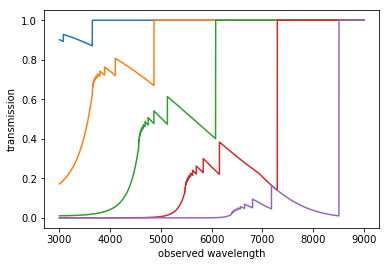

In [93]:
for z_source in np.arange(2,7,1):
    

    opt_depth_LAF = np.zeros((len(lam_obs),))
    opt_depth_DLA = np.zeros((len(lam_obs),))
    opt_depth_LC_LAF = np.zeros((len(lam_obs),))
    opt_depth_LC_DLA = np.zeros((len(lam_obs),))

    for j in tqdm(range(len(lam_j))):
        for i in range(len(lam_obs)):
            if (lam_obs[i] < 2.2*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
                opt_depth_LAF[i] = opt_depth_LAF[i] + A_LAF_j1[j]*np.power(lam_obs[i]/lam_j[j],1.2)
            elif (lam_obs[i] > 2.2*lam_j[j]) & (lam_obs[i] < 5.7*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
                opt_depth_LAF[i] = opt_depth_LAF[i] + A_LAF_j2[j]*np.power(lam_obs[i]/lam_j[j],3.7)
            elif (lam_obs[i] > 5.7*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
                opt_depth_LAF[i] = opt_depth_LAF[i] + A_LAF_j3[j]*np.power(lam_obs[i]/lam_j[j],5.5)

            if (lam_obs[i] < 3.0*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
                opt_depth_DLA[i] = opt_depth_DLA[i] + A_DLA_j1[j]*np.power(lam_obs[i]/lam_j[j],2.0)
            elif (lam_obs[i] > 3.0*lam_j[j]) & (lam_j[j] < lam_obs[i]) & (lam_j[j]*(1+z_source) > lam_obs[i]):
                opt_depth_DLA[i] = opt_depth_DLA[i] + A_DLA_j2[j]*np.power(lam_obs[i]/lam_j[j],3.0)
                
    lam_L = 911.8
    for j in tqdm(range(len(lam_j))):
            for i in range(len(lam_obs)):         
                if (z_source < 1.2):
                    if (lam_obs[i] > lam_L) & (lam_obs[i] < lam_L*(1+z_source)):
                        opt_depth_LC_LAF[i] = 0.325*(np.power((lam_obs[i]/lam_L),1.2) - np.power(1+z_source,-0.9)*np.power(lam_obs[i]/lam_L,2.1))
                    elif (lam_obs[i] > lam_L) & (lam_obs[i] > lam_L*(1+z_source)):
                        opt_depth_LC_LAF[i] = 0
                elif (z_source > 1.2) & (z_source) < 4.7:
                    if (lam_obs[i] > lam_L) & (lam_obs[i] < 2.2*lam_L):
                        opt_depth_LC_LAF[i] = 2.55e-2*np.power(1+z_source,1.6)*np.power(lam_obs[i]/lam_L,2.1) + 0.325*np.power(lam_obs[i]/lam_L,1.2) - 0.250*np.power(lam_obs[i]/lam_L,2.1)
                    elif (lam_obs[i] > lam_L) & (lam_obs[i] > 2.2*lam_L) & (lam_obs[i] < lam_L*(1+z_source)):
                        opt_depth_LC_LAF[i] = 2.55e-2*(np.power(1+z_source,1.6)*np.power(lam_obs[i]/lam_L,2.1) - np.power(lam_obs[i]/lam_L,3.7) )
                    elif (lam_obs[i] > lam_L) & (lam_obs[i] > (1+z_source)*lam_L):
                        opt_depth_LC_LAF[i] = 0
                elif (z_source > 4.7):
                    if (lam_obs[i] > lam_L) & (lam_obs[i] < 2.2*lam_L):
                        opt_depth_LC_LAF[i] = 5.22e-4*np.power(1+z_source,3.4)*np.power(lam_obs[i]/lam_L,2.1) + 0.325*np.power(lam_obs[i]/lam_L,1.2) -3.14e-2*np.power(lam_obs[i]/lam_L,2.1)
                    elif (lam_obs[i] > lam_L) & (lam_obs[i] > 2.2*lam_L) & (lam_obs[i] < 5.7*lam_L):
                        opt_depth_LC_LAF[i] = 5.22e-4*np.power(1+z_source,3.4)*np.power(lam_obs[i]/lam_L,2.1) + 0.218*np.power(lam_obs[i]/lam_L,2.1) -2.55e-2*np.power(lam_obs[i]/lam_L,3.7)
                    elif (lam_obs[i] > lam_L) & (lam_obs[i] > 5.7*lam_L) & (lam_obs[i] < lam_L*(1+z_source)):
                        opt_depth_LC_LAF[i] = 5.22e-4*(np.power(1+z_source,3.4)*np.power(lam_obs[i]/lam_L,2.1) - np.power(lam_obs[i]/lam_L,5.5) )
                    elif (lam_obs[i] > lam_L) & (lam_obs[i] > (1+z_source)*lam_L):
                        opt_depth_LC_LAF[i] = 0

                if (z_source < 2.0):
                    if (lam_obs[i] > lam_L) & (lam_obs[i] < lam_L*(1+z_source)):
                        opt_depth_LC_DLA[i] = 0.211*np.power(1+z_source,2.0) - 7.66e-2*np.power(1+z_source,2.3)*np.power(lam_obs[i]/lam_L,-0.3) - 0.135*np.power(lam_obs[i]/lam_L,2.0)
                    elif (lam_obs[i] > lam_L) & (lam_obs[i] > lam_L*(1+z_source)):
                        opt_depth_LC_DLA[i] = 0
                elif (z_source > 2.0):
                    if (lam_obs[i] > lam_L) & (lam_obs[i] < 3.0*lam_L):
                        opt_depth_LC_DLA[i] = 0.634 + 4.70e-2*np.power(1+z_source,3.0) - 1.78e-2*np.power(1+z_source,3.3)*np.power(lam_obs[i]/lam_L,-0.3) - 0.135*np.power(lam_obs[i]/lam_L,2.0) - 0.291*np.power(lam_obs[i]/lam_L,-0.3)       
                    elif (lam_obs[i] > lam_L) & (lam_obs[i] > 3.0*lam_L) & (lam_obs[i] < lam_L*(1+z_source)):
                        opt_depth_LC_DLA[i] = 4.70e-2*np.power(1+z_source,3.0) - 1.78e-2*np.power(1+z_source,3.3)*np.power(lam_obs[i]/lam_L,-0.3) - 2.92e-2*np.power(lam_obs[i]/lam_L,3.0)
                    elif (lam_obs[i] > lam_L) & (lam_obs[i] > (1+z_source)*lam_L):
                        opt_depth_LC_DLA[i] = 0
            
    opt_depth = opt_depth_LAF + opt_depth_DLA + opt_depth_LC_LAF + opt_depth_LC_DLA
    #mask1 = opt_depth > 1
    #temp = opt_depth
    #temp[mask1] = 1
    #transmission = 1 - temp
    plt.plot(lam_obs,np.exp(-(opt_depth_LAF + opt_depth_DLA + opt_depth_LC_LAF + opt_depth_LC_DLA)))
plt.xlabel('observed wavelength')
plt.ylabel('transmission')
plt.show()